# CIA World FactBook, demographic informaion of the world

## 1. Import the data from SQLite database

In [1]:
import pandas as pd
import numpy as np
import sqlite3
conn = sqlite3.connect("factbook.db")
query = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(query, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [4]:
query = "SELECT * FROM facts LIMIT 5"
facts_first5 = pd.read_sql_query(query, conn)
facts_first5

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


## 2. Analyze the statistics 

In [8]:
query = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts"
population_minmax = pd.read_sql_query(query, conn)
population_minmax

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


## 3. It is unreasonable to have a country with 0 population and a country with 7.2 billion population, which is the whole world's population. Let's see what are these countries. 

In [10]:
q3_1 = '''
SELECT name, population
FROM facts
WHERE population == 0
'''
q3_2 = '''
SELECT name, population
FROM facts
WHERE population == 7256490011
'''
country_min_pop = pd.read_sql_query(q3_1, conn)
country_max_pop = pd.read_sql_query(q3_2, conn)
print(country_min_pop)
print(country_max_pop)

         name  population
0  Antarctica           0
    name  population
0  World  7256490011


### Antarctica has the population of 0, and the whole world has over 7.2 billion population. 

## 4. Check population growth in all countries, excluding outliers

In [18]:
q4 = '''
SELECT name, population, population_growth, birth_rate, death_rate
FROM facts
WHERE NOT (name = "Antarctica" or name = "World")  
ORDER BY population DESC
'''
pop_growth = pd.read_sql_query(q4, conn)
pop_growth.dropna(axis=0, inplace=True)
pop_growth

,name,population,population_growth,birth_rate,death_rate
0,China,1.367485e+09,0.45,12.49,7.53
1,India,1.251696e+09,1.22,19.55,7.32
2,European Union,5.139494e+08,0.25,10.20,10.20
3,United States,3.213689e+08,0.78,12.49,8.15
4,Indonesia,2.559937e+08,0.92,16.72,6.37
5,Brazil,2.042598e+08,0.77,14.46,6.58
6,Pakistan,1.990858e+08,1.46,22.58,6.49
7,Nigeria,1.815621e+08,2.45,37.64,12.90
8,Bangladesh,1.689577e+08,1.60,21.14,5.61
9,Russia,1.424238e+08,0.04,11.60,13.69


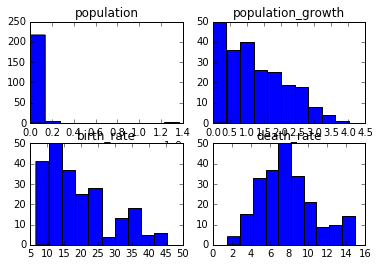

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
plot_list = pop_growth.columns[1:]
for i, item in enumerate(plot_list):
    ax = fig.add_subplot(2,2,i%2+i//2*2+1)
    ax.hist(pop_growth[item], bins=10)
    ax.set_title(item)


## 5. Calculate population density


q5 = '''
SELECT name, population/area_land as population_density
FROM facts
WHERE NOT (name = "Antarctica" or name = "World")  
ORDER BY population_density DESC
'''
pop_den = pd.read_sql_query(q5, conn)
pop_den

### Small city states and special districts have the highest population density. 

## 6. Water to land ratio

In [43]:
q6 = '''
SELECT name, Cast(area_water as float)/Cast(area_land as float) as water_land_ratio
FROM facts
WHERE NOT (name = "Antarctica" or name = "World")  
ORDER BY water_land_ratio DESC
'''
water_land_ratio = pd.read_sql_query(q6, conn)
water_land_ratio

,name,water_land_ratio
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240
